In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('purchase_table.xls')
df['birth_dt'] = df['birth_dt'].dt.strftime('%Y')
df['age'] = 2019 - df['birth_dt'].astype(int)
df.head(10)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age
0,820519,1990,2019-01-02 12:49:39,NaN,NaT,NaN,29
1,820521,1970,2019-01-02 14:14:39,NaN,NaT,NaN,49
2,820523,1991,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,28
3,820526,1985,2019-01-02 18:09:39,NaN,NaT,NaN,34
4,820544,1991,2019-01-03 12:24:42,NaN,NaT,NaN,28
5,820552,1999,2019-01-03 18:04:45,NaN,NaT,NaN,20
6,820561,1993,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,26
7,820562,1981,2019-01-04 13:46:59,NaN,NaT,NaN,38
8,820588,1984,2019-01-04 21:41:25,NaN,NaT,NaN,35
9,820598,1980,2019-01-05 00:54:46,NaN,NaT,NaN,39


In [9]:
df1 = df.groupby(['client_id','age'], as_index=False)[['reg_dttm']].count()
df2 = df1.groupby(['age'], as_index=False)[['client_id']].count()
df2.rename(columns={'client_id': 'count'}, inplace=True)
df2

,age,count
0,18,28
1,19,189
2,20,144
3,21,160
4,22,148
5,23,126
6,24,110
7,25,83
8,26,85
9,27,80


In [4]:
list_age = ['18-24', '25-34', '35-44', '45-54', '55+']
list_count = []
list_count.append(df2[(df2.age >= 18)&(df2.age <= 24)]['count'].sum())
list_count.append(df2[(df2.age >= 25)&(df2.age <= 34)]['count'].sum())
list_count.append(df2[(df2.age >= 35)&(df2.age <= 44)]['count'].sum())
list_count.append(df2[(df2.age >= 45)&(df2.age <= 54)]['count'].sum())
list_count.append(df2[(df2.age >= 55)]['count'].sum())
data = pd.DataFrame({'Возраст': list_age, 'Число клиентов': list_count})
data

,Возраст,Число клиентов
0,18-24,905
1,25-34,662
2,35-44,305
3,45-54,161
4,55+,66


Text(0,0.5,'Число клиентов')

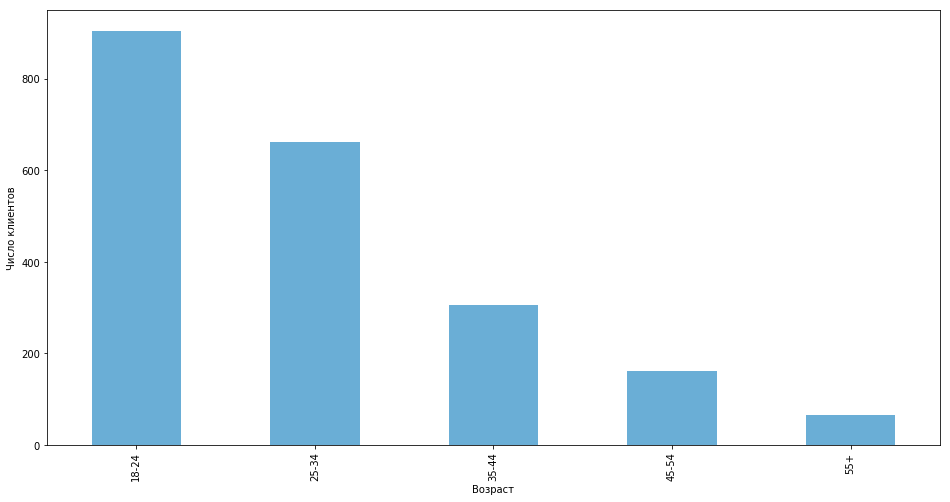

In [5]:
blue = plt.cm.Blues(0.5)
fig, ax = plt.subplots(figsize=(16, 9))
data.set_index('Возраст')['Число клиентов'].plot(kind='bar', ax = ax, figsize=(16, 8), color = blue)
ax.set_ylabel('Число клиентов')

Text(0.5,0,'Возраст')

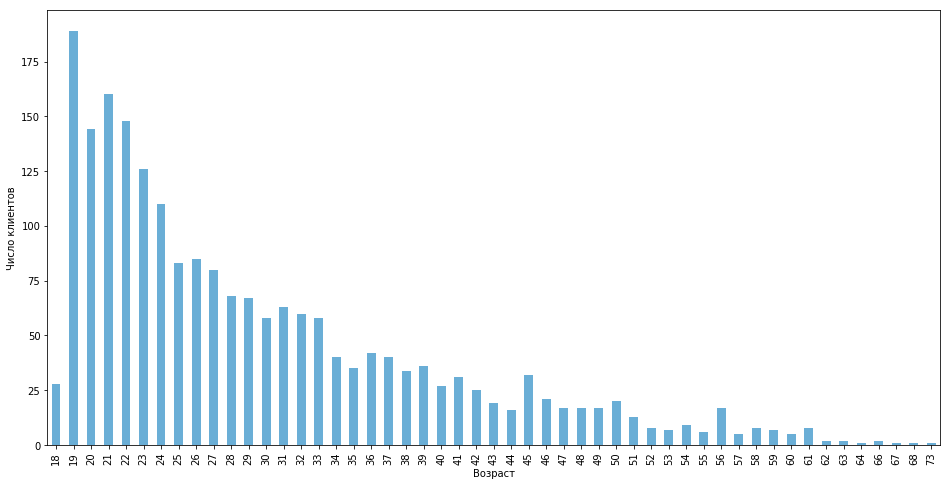

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
df2.set_index('age')['count'].plot(kind='bar', ax = ax, figsize=(16, 8), color = blue)
ax.set_ylabel('Число клиентов')
ax.set_xlabel('Возраст')